In [1]:
from sklearn.utils import shuffle 
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split  
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers.core import Dropout

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
mnist = datasets.fetch_mldata('MNIST original',data_home='.')
n = len(mnist.data)
N = 10000
indices = np.random.permutation(range(n))[:N]
X = mnist.data[indices]
y= mnist.target[indices]
Y = np.eye(10)[y.astype(int)]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)


In [3]:
from keras import backend as K
def weight_variable(shape):
    return K.truncated_normal(shape,stddev=0.01)

In [4]:
#model set
n_in = len(X[0])
n_hidden = 200
n_out = len(Y[0])

model = Sequential()
model.add(Dense(n_hidden,input_dim=n_in))
model.add(Activation('tanh'))
model.add(Dropout(0.5))                    

model.add(Dense(n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.5)) 

model.add(Dense(n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.5)) 

model.add(Dense(n_out,kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01),metrics=['accuracy'])


/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/tensor_util.py:509: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(tensor.tensor_content, dtype=dtype).reshape(shape)
/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/tensor_util.py:509: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(tensor.tensor_content, dtype=dtype).reshape(shape)
/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/tensor_util.py:509: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(tensor.tensor_content, dtype=dtype).reshape(shape)
/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/tensor_util.py:509: DeprecationWarning: The bina

In [5]:

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))

In [6]:
history = LossHistory()

In [7]:
epochs = 200
batch_size = 200

hist=model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,Y_test),verbose=0,callbacks=[history])

/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/tensor_util.py:509: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(tensor.tensor_content, dtype=dtype).reshape(shape)
/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/tensor_util.py:509: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(tensor.tensor_content, dtype=dtype).reshape(shape)


In [8]:
#print(history.losses)
#print(history.accuracy)

In [9]:
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']
#print(val_acc)
#print(range(epochs))

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

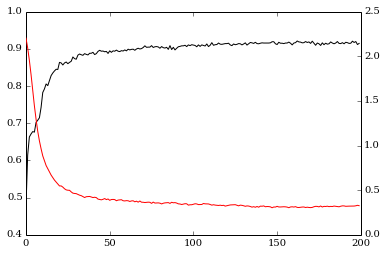

In [10]:
%matplotlib inline
#val_acc=history.accuracy
plt.rc('font',family='serif')
fig = plt.figure()
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(epochs),val_acc,label='acc',color='black')

ax_loss = ax_acc.twinx()
ax_loss.plot(range(epochs),val_loss,label='loss',color='red')
plt.xlabel('epochs')

#plt.savefig('mnist_keras.eps')
#plt.savefig('mnist_keras.jpeg')
plt.show()

In [11]:
loss_and_metrics= model.evaluate(X_test,Y_test)
print(loss_and_metrics)

2000/2000 [==============================] - 0s 209us/step
[0.3260221407711506, 0.9145]
